In [41]:
import pathlib
path=str(pathlib.Path().resolve().parent)+"/imagenes/"

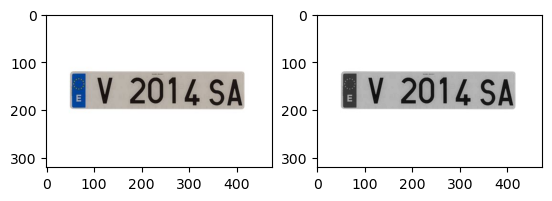

In [42]:
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread(path+"matricula.jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
fig,ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(gray,cmap="gray")

La idea es que cada letra/número lo detecte independientemente

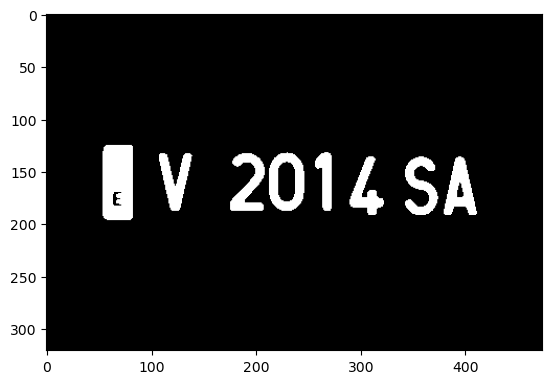

In [43]:
blur = cv.GaussianBlur(gray,(7,7),sigmaX=0,sigmaY=0)
_,th = cv.threshold(blur,127,255,cv.THRESH_BINARY_INV)
plt.imshow(th,cmap="gray")

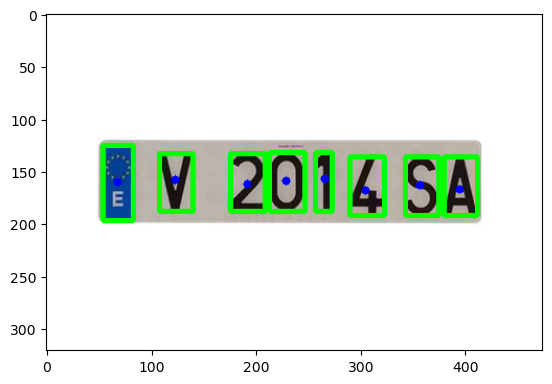

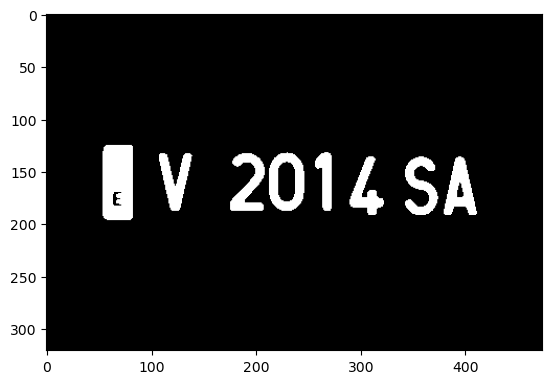

In [44]:
# CONECIVIDAD PUEDE SER 4 O 8 DEPENDIENDO DE LOS LADOS
# OCHO AÑADE LAS ESQUINAS TMN
from cv2 import CV_32S
import numpy as np

analisis = cv.connectedComponentsWithStats(th, connectivity=4, ltype = cv.CV_32S)
(totallabels, labels_ids, values, centroide) = analisis

salida = np.zeros(gray.shape, dtype="uint8")
cp = img.copy()

for i in range(1, totallabels):
  area = values[i, cv.CC_STAT_AREA]
  x1 = values[i, cv.CC_STAT_LEFT]
  y1 = values[i, cv.CC_STAT_TOP]
  w = values[i, cv.CC_STAT_WIDTH]
  h = values[i, cv.CC_STAT_HEIGHT]

  mascara = (labels_ids == i).astype("uint8") * 255

  (x, y) = centroide[i]

  salida = cv.bitwise_or(salida, mascara)
  cv.rectangle(cp, (x1, y1), (x1+w, y1+h), (0,255,0), 3)
  cv.circle(cp, (int(x), int(y)), 4, (0,0,255), -1)

plt.imshow(cp)
plt.show()
plt.imshow(salida, cmap="gray")
plt.show()